# 이상치
- 결측치, 범위에서 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우 발생
- 이상치를 발견하면 확인 작업 후 특정한 값을 대체, 삭제
- 극단치 -> IQR 방식 
    - matplotlib에서  boxplot 함수를 이용하여 극단치를 확인
    - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 범위 지정 
    - IQR = Q3 - Q1
    - 극단치의 경계 (Q3 + 1.5 * IQR), (Q1 - 1.5 * IQR)
    - 해당 경계값을 loc를 이용하여 확인 
    - 1.5 값을 조절하여 극단치의 범위를 변경

In [ ]:
# 사이킷런 설치 
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [ ]:
# 데이터셋 로드 
wine_load = load_wine()

In [ ]:
wine_load.keys()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# data, feature_names를 이용해서 데이터프레임 생성 
wine = pd.DataFrame( wine_load['data'], 
                    columns=wine_load['feature_names'] )

In [ ]:
wine.head()

In [ ]:
# 종복변수인 target 데이터를 wine에 열 추가 
wine['class'] = wine_load['target']

In [ ]:
wine_load['target_names']

In [ ]:
wine_load['frame']

In [ ]:
wine.head()

In [ ]:
# color_intensity 데이터에서 극단치가 존재하는가?
# boxplot을 이용해서 확인 
plt.boxplot(wine['color_intensity'])
plt.show()

In [ ]:
wine['color_intensity'].describe()['25%']

In [ ]:
# numpy 라이브러리를 이용해서 1사분위, 3사분위 수를 출력 
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])

In [ ]:
q_3

In [ ]:
iqr = q_3 - q_1
upper_whis = q_3 + ( 1.5 * iqr )
lower_whis = q_1 - ( 1.5 * iqr )
print(upper_whis, lower_whis)

In [ ]:
flag = (wine['color_intensity'] > upper_whis) | \
    (wine['color_intensity'] < lower_whis)
flag

In [ ]:
wine.loc[flag]

In [ ]:
4 / len(wine)

### iqr을 이용하여 극단치 판단하는 함수 
- 매개변수 3개 
    - _df : 데이터프레임 
    - _cols : 극단치를 판단하려고 하는 컬럼의 이름 (가변)
        - _cols의 타입은 tuple
    - _num : 신뢰구간 범위를 지정하는 수 기본값은 1.5
- 빈 딕셔너리를 생성
- _cols의 개수만큼 반복 실행 
    - 컬럼의 데이터를 기준으로 1사분위수, 3사분위수를 생성 
    - 1사분위수와 3사분위수를 이용하여 iqr 생성
    - 1사분위수, 3사분위수, iqr를 이용하여 극단치의 경계를 생성
    - 데이터프레임에서 극단치의 경계를 이용하여 극단치 데이터를 확인
    - 해당 데이터프레임 비어있는 딕셔너리에 key값은 컬럼의 이름으로 value는 데이터프레임으로 추가 
- 딕셔너리를 되돌려준다.

In [ ]:
def outliers_iqr(
        _df, *_cols, _num = 1.5
):
    # 빈 딕셔너리를 생성 -> 함수의 결과 값
    result = dict()
    # _cols를 기준으로 반복 실행 
    for col in _cols:
        # col의 데이터에서 1사분위, 3사분위 수 변수에 저장 
        q_1, q_3 = np.percentile(_df[col], [25, 75])
        # iqr 생성 
        iqr = q_3 - q_1
        # 상단 경계, 하단 경계 생성 
        upper_whis = q_3 + ( _num * iqr )
        lower_whis = q_1 - ( _num * iqr )
        print(f"""
                {col} 컬럼의 데이터에서 
                상단의 극단치 경계 값은 {upper_whis}이고
                하단의 극단치 경계 값은 {lower_whis}입니다. 
              """)
        # 조건식 생성 
        flag = (_df[col] > upper_whis) | \
                (_df[col] < lower_whis)
        outlier = _df.loc[flag, ]
        result[col] = outlier
    return result

In [ ]:
cols = list(wine.columns[:3])

In [ ]:
# wine과 cols을 이용해서 함수에 입력값으로 대입 
# cols가 리스트형태 -> 가변 매개변수인 _cols에 대입하려면?
outliers = outliers_iqr(wine, *cols)

In [ ]:
outliers['alcohol']

In [ ]:
outliers['malic_acid']

In [ ]:
outliers['ash']

### 극단치의 정제 
1. 극단치를 제거 
    - 데이터의 개수가 매우 많고 극단치가 존재하는 데이터의 개수가 전체 데이터의 비해서 매우 작은 경우에는 제거 
    - 극단치 제거 -> 데이터의 개수가 감소
2. 극단치를 특정 데이터로 대체
    - 극단치의 값들을 다른 값으로 대체하는 경우는 데이터 분석가에 따라서 값들은 차이 발생

In [ ]:
df = wine.copy()

In [ ]:
# 극단치를 제거 -> ash 컬럼에서 극단치 제거 
# drop() -> 조건에 따라 행을 제거할것인가 열을 제거할것인가
    # 조건 -> outliers['ash']의 인덱스의 값
    # 행을 제거 -> axis = 0
df.drop(outliers['ash'].index, axis=0, inplace=True)

In [ ]:
print(f"원본 데이터의 개수 : {len(wine)}")
print(f"극단치가 제거된 데이터의 개수 : {len(df)}")

In [ ]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max 값으로 대체
# 하단경계보다 낮은 극단치의 데이터를 극단치를 제외한 min 값으로 대체
max_value = df['ash'].max()
min_value = df['ash'].min()

In [ ]:
print(max_value, min_value)

In [ ]:
center_value = np.percentile(df['ash'], 50)

In [ ]:
df2 = wine.copy()

In [ ]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max 값으로 대체
# 조건 -> outliers['ash']에서 center_value보다 큰 데이터의 index
flag = outliers['ash']['ash'] > center_value


In [ ]:
flag_index= []
for i in flag.index:
    # print(flag[i])
    if flag[i]:
        # print(i)
        flag_index.append(i)

In [ ]:
df2.loc[flag_index, 'ash'] = max_value

In [ ]:
flag_index= []
for i in flag.index:
    # print(flag[i])
    if not(flag[i]):
        # print(i)
        flag_index.append(i)

In [ ]:
flag_index

In [ ]:
df2.loc[flag_index, 'ash'] = min_value

In [ ]:
df2['ash'].describe()

In [ ]:
df3 = wine.copy()

In [ ]:
df3['ash'].describe()

In [ ]:
# max_value보다 크다면 -> 상단 극단치 경계보다 높은 데이터 
flag = df3['ash'] > max_value

df3.loc[flag, 'ash'] = max_value

In [ ]:
flag = df3['ash'] < min_value
df3.loc[flag, 'ash'] = min_value

In [ ]:
df3['ash'].describe()

In [ ]:
# replace 함수를 이용
flag = outliers['ash']['ash'] > center_value

In [ ]:
upper_data = outliers['ash'].loc[flag, 'ash']

In [ ]:
df4 = wine.copy()

In [ ]:
for i in upper_data:
    # print(i)
    df4['ash'].replace(i, max_value, inplace=True)

In [ ]:
lower_data = outliers['ash'].loc[~flag, 'ash']

In [ ]:
for i in lower_data:
    df4['ash'].replace(i, min_value, inplace=True)

In [ ]:
df4['ash'].describe()

### 범주형 변수 처리 
- 수학적 연산으로 예측을 하는 모델이 대부분이기 때문에 범주형 변수를 직접적으로 사용하기가 어렵다. 
    - 더미 변수를 생성해서 모델에 학습
    - 범주형 데이터들을 컬럼으로 생성하여 0과 1로 데이터를 대입해서 포함 여부를 만들어준다. 

In [ ]:
# wine 데이터프레임에서 class 컬럼의 데이터들을 target_names로 변경 
wine_load['target_names']

In [ ]:
flag = wine['class'] == 0
wine.loc[flag, 'class'] = 'class_0'

In [ ]:
wine['class'].value_counts()

In [ ]:
# map() 함수 이용 -> 
wine['class'].map(
    {
        'class_0' : 'class_0', 
        1 : 'class_1', 
        2 : 'class_2'
    }
)

In [ ]:
# if문 한줄로 표현 : '참인경우데이터' if 조건식 else '거짓인경우 데이터'
wine['class'] = wine['class'].map(
    lambda x : 'class_1' if x == 1 else (
        'class_2' if x == 2 else 'class_0'
    )
)

In [ ]:
wine['class'].value_counts()

In [ ]:
len(wine.columns)

In [ ]:
# 범주형 데이터를 더미변수로 생성 
# get_dummies() 함수 이용 -> 판다스에 존재하는 함수 
wine_dummy = pd.get_dummies(
    wine, 
    columns= ['class']
)

In [ ]:
len(wine_dummy.columns)

In [ ]:
wine_dummy['class_class_1'].sum()

### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위해서 데이터를 train, test 데이터로 나누고 독립변수, 종속변수로 분리하는 작업 
- train, test 나눠줄때는 비율은 일반적으로 70 : 30으로 나눠준다.
- sklearn 라이브러리에서 train_test_split() 함수를 이용
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = True, stratify = None)
        - X : 독립 변수 데이터
        - Y : 종속 변수 데이터 
        - test_size : test 데이터의 비율(0 ~ 1)
        - random_state : 임의의 번호를 지정. 같은 데이터에서 같은 번호를 입력하면 같은 데이터를 확인 
        - shuffle : True라면 데이터를 나누기 전에 섞어준다. 
        - stratify : None이 아닌 경우 데이터는 지정한 변수(컬럼의 데이터)를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris_load = load_iris()

In [4]:
iris_load['frame']

In [5]:
iris = pd.DataFrame(iris_load['data'], 
                    columns=iris_load['feature_names'])

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_load['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_load['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['class'] = iris_load['target']

In [10]:
iris['class'] = iris['class'].map(
    {
        0 : 'setosa', 
        1 : 'versicolor', 
        2 : 'vurginica'
    }
)

In [11]:
iris['class'].value_counts()

class
setosa        50
versicolor    50
vurginica     50
Name: count, dtype: int64

In [12]:
# train, test로 데이터를 나눠준다. 
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1), 
    iris['class'], 
    test_size= 0.3, 
    random_state= 42
)

In [13]:
print(f"학습 데이터의 수 : {len(x_train)}, 테스트 데이터의 수 : {len(x_test)}")

학습 데이터의 수 : 105, 테스트 데이터의 수 : 45


In [14]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [15]:
y_train.value_counts()

class
versicolor    37
vurginica     37
setosa        31
Name: count, dtype: int64

In [16]:
# iris 데이터에서 class 값들의 비율은 동일하게 데이터를 나눠준다. 
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1), 
    iris['class'], 
    test_size=0.3, 
    random_state=42, 
    stratify=iris['class'], 
    shuffle = True
)

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [17]:
y_train.value_counts()

class
versicolor    35
setosa        35
vurginica     35
Name: count, dtype: int64

In [18]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,7.3,2.9,6.3,1.8
63,6.1,2.9,4.7,1.4
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
127,6.1,3.0,4.9,1.8
140,6.7,3.1,5.6,2.4
53,5.5,2.3,4.0,1.3
69,5.6,2.5,3.9,1.1
20,5.4,3.4,1.7,0.2
141,6.9,3.1,5.1,2.3


### 데이터의 불균형 문제 처리 
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확하게 분류하는 것이 중요
- 보통 이상 데이터가 target으로 사용하는 경우가 많다. 
- 데이터가 불균형할때는 분류의 성능과 target 데이터를 정확하게 분류해내는 목표가 일치하지 않은 경우 많다. 
- 분석 결과 해석뿐이 아니라 머신러닝 모델에서 문제 발생 
- 소수의 데이터인 target의 중요를 낮게 판단해서 궁금으로 분석가능 모델이 생성 X
- 소수의 데이터를 늘려주는 방법 오버 샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 방법이 언더 샘플링

In [19]:
# 라이브러리 설치 
# !pip install imbalanced-learn

### 언더샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터 셋의 라벨의 수 수준으로 감소시키는 방법 
- 이 기법은 데이터 불균형 문제의 해결이 가능하지만 데이터의 개수가 줄어들어서 학습 성능이 떨어질수 있다

In [20]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [21]:
# 랜덤 데이터셋 생성 
# 90 : 10 비율 데이터 생성
x, y = make_classification(
    n_samples=2000, 
    n_features=5, 
    weights=[0.9], 
    flip_y=0
)

In [22]:
x

array([[ 0.44751623, -0.35981462,  0.17980361,  0.42347497,  2.84370439],
       [-0.11638608, -1.13579823,  0.9325111 , -2.25937085, -0.67844311],
       [ 1.26478765, -1.37054636,  0.78985136,  0.57862285, -1.45524225],
       ...,
       [ 1.07904682, -0.8865268 ,  0.44863181,  0.98795798, -1.25368761],
       [ 0.03870442, -0.95766492,  0.75360088, -1.583194  ,  0.06360947],
       [ 0.98069869, -0.17767993, -0.09253486,  1.99588333, -0.63558133]])

In [23]:
Counter(y)

Counter({0: 1801, 1: 199})

In [24]:
# 랜덤 언더 샘플링이라는 class 생성 -> 기본값 사용 -> 데이터의 개수를 동일하게 맞춰준다.
undersample = RandomUnderSampler()

In [25]:
# fit_resample()
x_under, y_under = undersample.fit_resample(x, y)

In [26]:
Counter(y_under)

Counter({0: 199, 1: 199})

In [27]:
# class생성시 인자의 값을 대입 
# sampling_strategy : 소수의 데이터의 비율을 지정하여 다수의 데이터의 개수를 정해준다. 
undersample2 =RandomUnderSampler(
    sampling_strategy= 0.5
)

In [28]:
x_under2, y_under2 = undersample2.fit_resample(x, y)

In [29]:
Counter(y_under2)

Counter({0: 398, 1: 199})

### 오버 샘플링 
- 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법 
- 데이터의 손실이 없기 때문에 일반적으로는 언더샘플링에 비해 유리해서 사용

#### 랜덤 오버 샘플링 
- 소수의 데이터를 단순 복제하여 다수의 데이터의 개수와 비율을 맞춰준다. 
- 단순 복제이기 때문에 데이터의 분포는 유지 
- 수가 증가 증가해서 가중치 발생
- 오버피팅의 위험성은 존재하지만 불균형 문제는 해결

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
oversample = RandomOverSampler()

In [32]:
x_over , y_over = oversample.fit_resample(x, y)

In [33]:
Counter(y_over)

Counter({0: 1801, 1: 1801})

In [34]:
oversample2 = RandomOverSampler(
    sampling_strategy=0.5
)

In [35]:
x_over2, y_over2 = oversample2.fit_resample(x, y)

In [36]:
Counter(y_over2)

Counter({0: 1801, 1: 900})

#### SMOTE
- 소수의 데이터의 관측 값에 대한 K개의 최근접 이웃을 찾고 관측 값과 이웃으로 선택된 값 사이에 임의의 데이터를 생성하는 방법 

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote_sample = SMOTE()

In [39]:
x_sm , y_sm = smote_sample.fit_resample(x, y)

In [40]:
Counter(y_sm)

Counter({0: 1801, 1: 1801})

In [41]:
# 언더 샘플링, 오버 샘플링 데이터를 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
x[ : , 1 ]

array([-0.35981462, -1.13579823, -1.37054636, ..., -0.8865268 ,
       -0.95766492, -0.17767993])

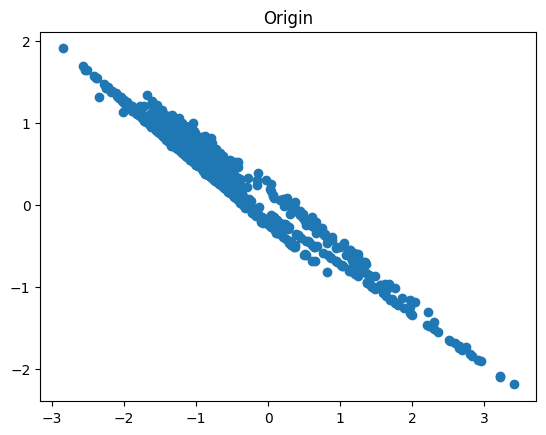

In [45]:
plt.scatter(x[:, 1], x[:, 2])
plt.title('Origin')
plt.show()

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

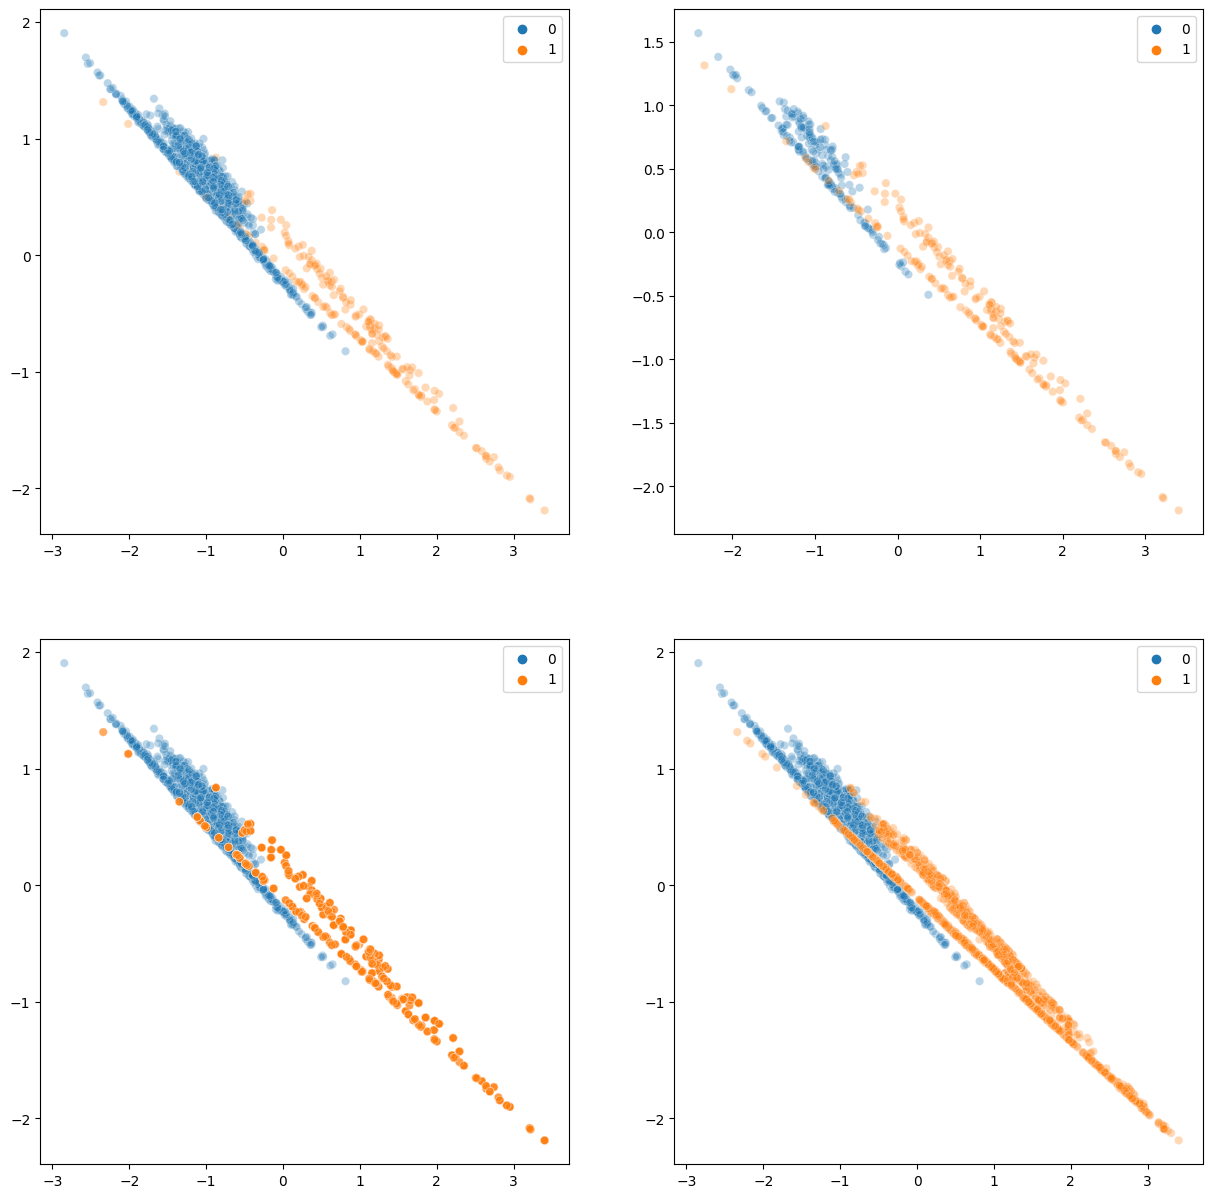

In [48]:
# subplot -> 하나의 공간에 여러개의 그래프를 그리는 방법 
# seaborn 라이브러리를 이용해서 그래프 여러개 그린다. 

# 서브 플롯을 이용해서 공간을 나눈다. 
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (15, 15) )

sns.scatterplot(x = x[:, 1], y = x[ : , 2], ax=axes[0][0], hue=y, alpha=0.3)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], ax = axes[0][1], 
                hue = y_under, alpha = 0.3)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], ax=axes[1][0], 
                hue=y_over, alpha = 0.3)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], ax=axes[1][1], 
                hue=y_sm, alpha=0.3)


plt.show()
